In [2]:
import pandas as pd
import numpy as np

In [3]:
spf = pd.read_csv('StudentPerformanceFactors.csv')
spf


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
spf.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = spf[['Hours_Studied']]   # Features
y = spf['Exam_Score']        # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lin = LinearRegression()
lin.fit(X_train, y_train)

print (f"Intercept: {lin.intercept_}")
print (f"Coefficient: {lin.coef_[0]}")

Intercept: 61.511167469044246
Coefficient: 0.2856687444430867


Intercept shows the value of the target variable when the input feature is zero. In this case, the base student score without considering the hours studied.

Coefficient is the slope of the linear regression line, representing the rate at which the student score increases for each additional hours studied.

A coefficient of 61.5 means that for every additional study hours, the score increases by 61.5

In [9]:
y_pred = lin.predict(X_test)

print("Predicted Scores:", y_pred)
print("Actual Scores:", y_test.values)

Predicted Scores: [67.22454236 67.79587985 67.5102111  ... 68.08154859 67.5102111
 68.08154859]
Actual Scores: [65 65 71 ... 66 63 72]


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.4475687452945643
Mean Squared Error: 10.85592128879332
R-squared: 0.2319868674542106


Implementing with Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

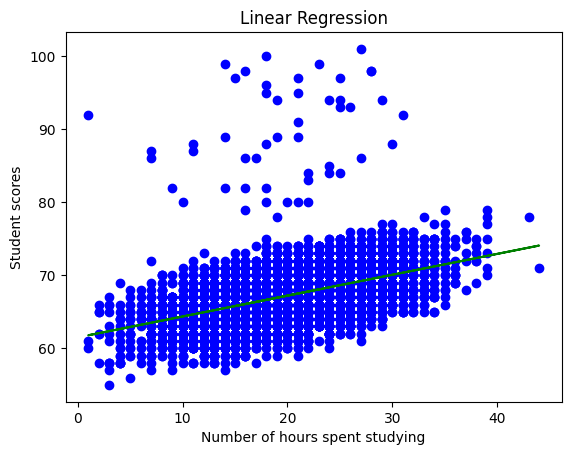

In [14]:
plt.scatter(X, y, color='blue')

plt.plot(X, lin.predict(X), color = 'green')
plt.title('Linear Regression')
plt.xlabel('Number of hours spent studying')
plt.ylabel('Student scores')

plt.show()

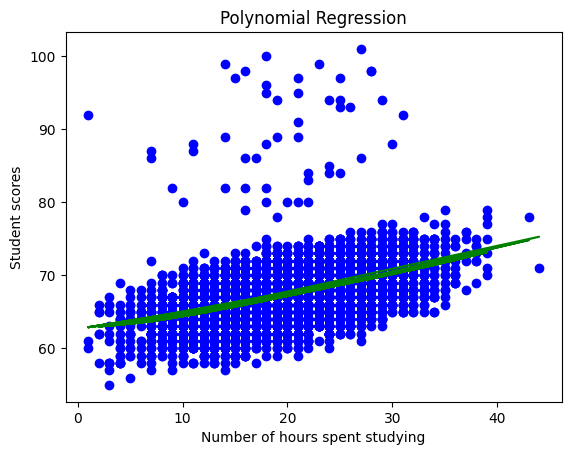

In [15]:
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Number of hours spent studying')
plt.ylabel('Student scores')

plt.show()

In [16]:
# Predict using the polynomial regression model
y_poly_pred = lin2.predict(poly.transform(X_test))

# Evaluate performance
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression Mean Absolute Error: {mae_poly}")
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression R-squared: {r2_poly}")

Polynomial Regression Mean Absolute Error: 2.4424813382090167
Polynomial Regression Mean Squared Error: 10.835053099782439
Polynomial Regression R-squared: 0.2334632085943541


In [17]:
X = spf[['Hours_Studied', 'Attendance', 'Previous_Scores']]   # Features
y = spf['Exam_Score']        # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lin2 = LinearRegression()
lin2.fit(X_train, y_train)

print (f"Intercept: {lin2.intercept_}")
print (f"Coefficient: {lin2.coef_[0]}")

Intercept: 42.0063795594046
Coefficient: 0.2874979694737253


In [19]:
# Use the correct model trained with all features
y2_pred = lin2.predict(X_test)

print("Predicted Scores:", y2_pred)
print("Actual Scores:", y_test.values)

Predicted Scores: [66.02422558 67.12132203 68.68064739 ... 65.85179818 65.55123954
 70.50004389]
Actual Scores: [65 65 71 ... 66 63 72]
